This notebook processes the CSV file saved by `generic-is-empty.ipynb`.

In [1]:
library(ggplot2)
library(tables)
library(tidyverse)
library(tikzDevice)
options(scipen = 20, digits=2, width=200)
plain <- function(x,...) format(x, ..., scientific = FALSE, drop0trailing = TRUE)

Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3     ✔ purrr   0.3.3
✔ tidyr   0.8.3     ✔ dplyr   0.8.5
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.3     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::src()       masks Hmisc::src()
✖ dplyr::summarize() masks Hmisc::summarize()


# Load and prepare the data

In [2]:
bench <- read_csv('bench.csv', col_types="iddddddfiiiiiiicf")

Warning message:
“Missing column names filled in: 'X1' [1]”

Remove the `Python/`, `C++/`, and `acc/` prefixes in column names.  These were useful in Pandas, but they will clutter our figures and tables.

In [3]:
names(bench)

[1] "X1"                  "Python/is_empty1"    "Python/is_empty2"    "C++/is_empty_spot29" "C++/is_empty_atva19" "C++/is_empty_spot28" "C++/old_is_empty"    "/result"            
 [9] "aut/states"          "aut/edges"           "aut/sccs"            "aut/ntsccs"          "aut/nrsccs"          "aut/nrstates"        "aut/sets"            "aut/acc"            
[17] "/bench"

In [4]:
names(bench)<- sub("bench", "dataset", sub(".*/", "", names(bench)))

Rename the results to something meaningful.

In [5]:
levels(bench$result)

[1] "FFFFFF" "TTTTTT"

In [6]:
levels(bench$result) <- c("non-empty", "empty")

Remove dataset `small`, because the automata are really too small to be interesting, and not discussing them saves space in the paper.

In [7]:
bench <- subset(bench, dataset != "small")

Reversethe order of rows in the dataframes, because there are so many "ltlcross" points at the end that we want them so be plotted first, under the points from the other datasets.

In [8]:
bench <- bench[nrow(bench):1,]

# Plots

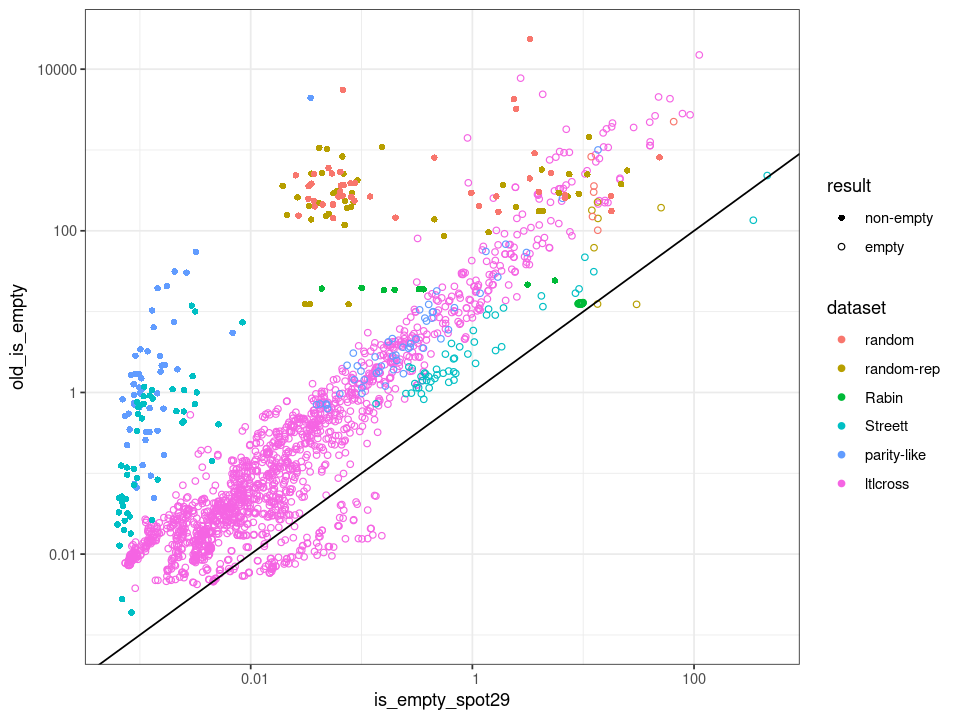

In [9]:
options(repr.plot.width=8, repr.plot.height=6)

ggplot(bench, aes(x=is_empty_spot29, y=old_is_empty, colour=dataset, shape=result)) + 
  geom_point() +  geom_abline(slope=1, intercept=0) + scale_shape_manual(values=c(16, 1)) +
  expand_limits(x=0.001, y=0.001) + scale_x_log10(labels=plain) + scale_y_log10(labels=plain) + theme_bw()

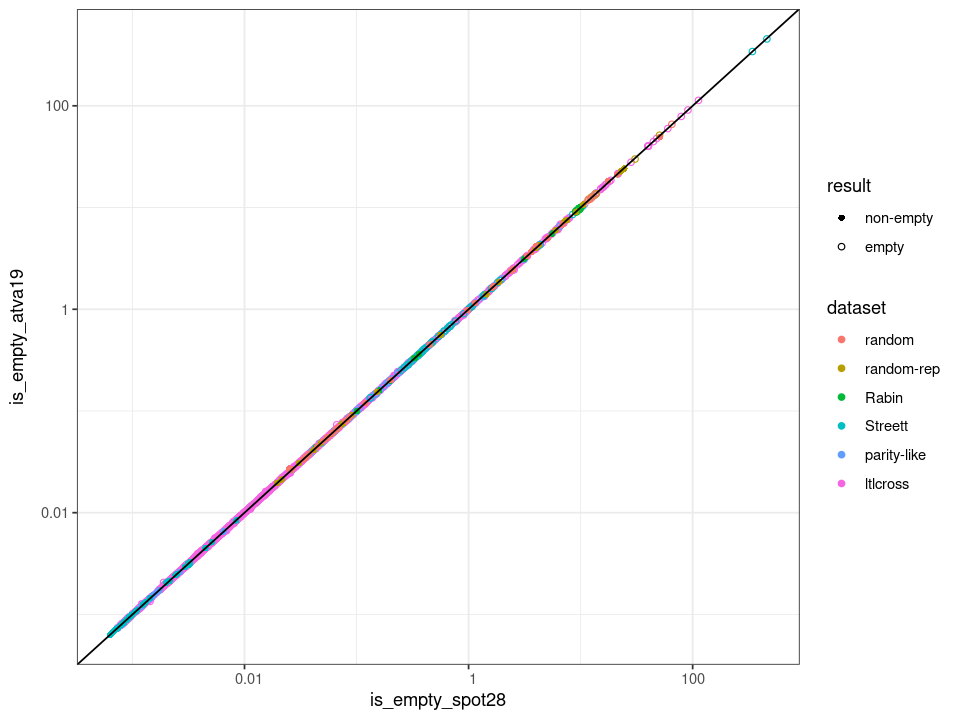

In [10]:
ggplot(bench, aes(x=is_empty_spot28, y=is_empty_atva19, colour=dataset, shape=result)) + 
  geom_point() +  geom_abline(slope=1, intercept=0) + scale_shape_manual(values=c(16, 1)) +
  expand_limits(x=0.001, y=0.001) + scale_x_log10(labels=plain) + scale_y_log10(labels=plain) + theme_bw()

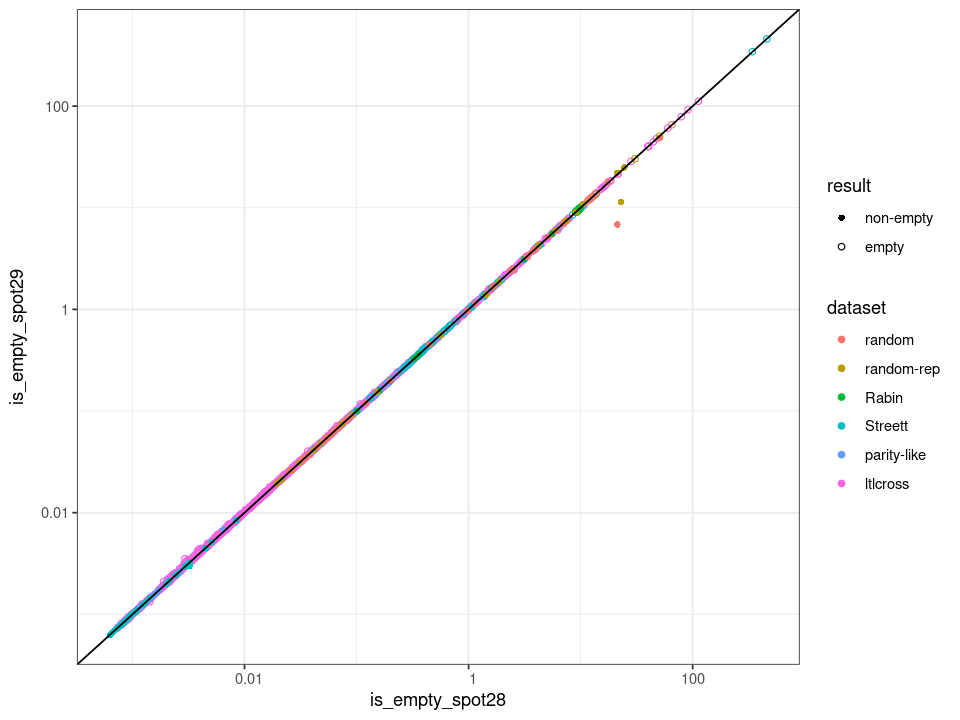

In [11]:
ggplot(bench, aes(x=is_empty_spot28, y=is_empty_spot29, colour=dataset, shape=result)) + 
  geom_point() +  geom_abline(slope=1, intercept=0) + scale_shape_manual(values=c(16, 1)) +
  expand_limits(x=0.001, y=0.001) + scale_x_log10(labels=plain) + scale_y_log10(labels=plain) + theme_bw()

In [12]:
subset(bench, is_empty_spot29 < is_empty_spot28/1.5)

X1,is_empty1,is_empty2,is_empty_spot29,is_empty_atva19,is_empty_spot28,old_is_empty,result,states,edges,sccs,ntsccs,nrsccs,nrstates,sets,acc,dataset
48,28,11.6,11.3,23,23,1446,non-empty,100000,125211,3,1,1,99998,20,(Inf(5) & (Fin(14) | Inf(8)) & (Fin(1) | (Fin(7) & Inf(17)))) | (((Inf(11) & Fin(2)) | (Inf(11)&Inf(13)) | Fin(0) | ((Inf(4)&Inf(11)) & Fin(13))) & (((Fin(17) | (Inf(1)&Inf(7))) & Fin(7)) | (((Inf(12)&Inf(16)) | Inf(14) | Fin(18)) & Fin(11)) | Inf(10) | ((Inf(11) | Fin(17)) & Fin(6))) & ((Inf(19) & Fin(11)) | Fin(3) | (Fin(11) & (Fin(16) | Inf(15) | Inf(7)) & Fin(9) & Fin(7)) | (Fin(2) & Fin(17)))),random-rep
7,18,6.9,6.8,21,21,253,non-empty,100000,125447,2,1,1,99999,20,(((Fin(9) & (Inf(8)&Inf(14))) | Fin(11)) & (Fin(13) | (Inf(18) & Fin(2) & Fin(3)))) | (Fin(16) & (Inf(19) | (Fin(0)|Fin(6)) | (((Fin(12) & Inf(7)) | Fin(1) | (Fin(4) & (Fin(10) | Inf(15)) & Inf(5))) & Inf(17)))),random


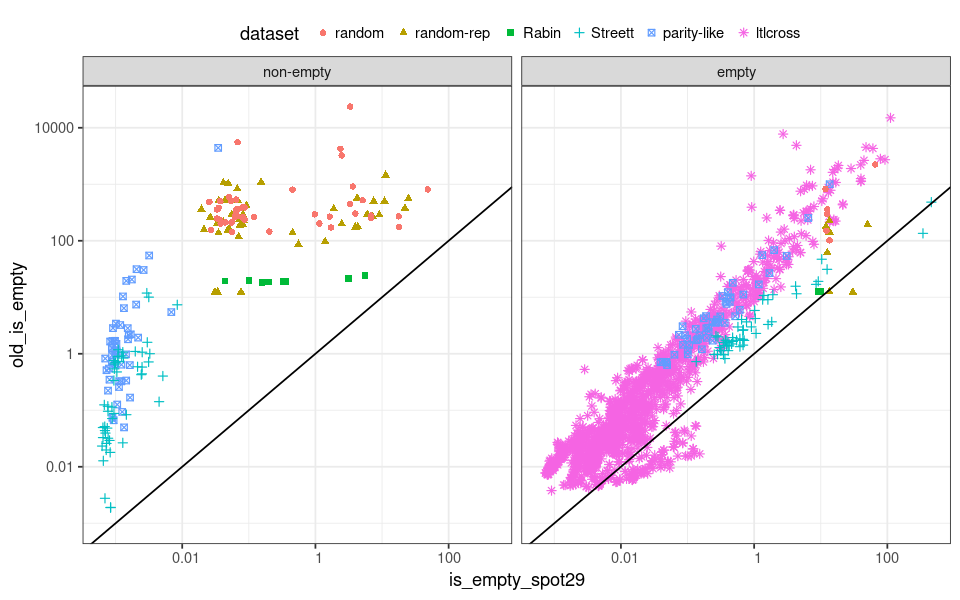

In [13]:
options(repr.plot.width=8, repr.plot.height=5)

g <- guide_legend(nrow=1)
th <- theme(legend.position="top", legend.box.spacing=unit(0, "mm"), legend.text=element_text(margin=margin(l=-7,r=-3)))
p1 <- ggplot(bench, aes(x=is_empty_spot29, y=old_is_empty, colour=dataset, shape=dataset)) + 
  geom_point() + geom_abline(slope=1, intercept=0) +
  expand_limits(x=0.001, y=0.001) + scale_x_log10(labels=plain) + scale_y_log10(labels=plain) +
  facet_wrap(~ result) + theme_bw() + th + guides(colour = g, shape=g)
p1

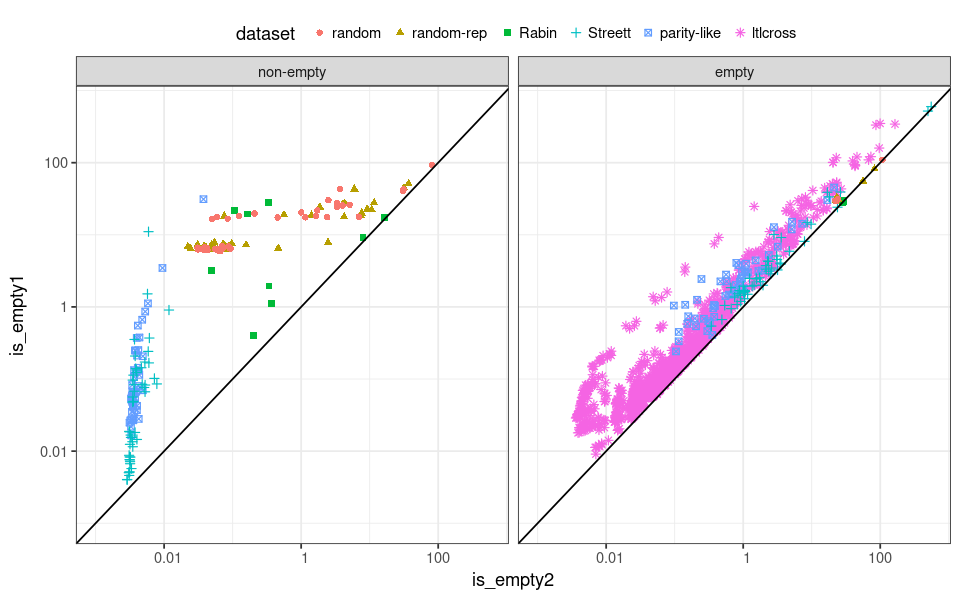

In [14]:
p2 <- ggplot(bench, aes(x=is_empty2, y=is_empty1, colour=dataset, shape=dataset)) + 
  geom_point() + geom_abline(slope=1, intercept=0) +
  expand_limits(x=0.001, y=0.001) + scale_x_log10(labels=plain) + scale_y_log10(labels=plain) +
  facet_wrap(~ result) + theme_bw() + th + guides(colour = g, shape=g)
p2

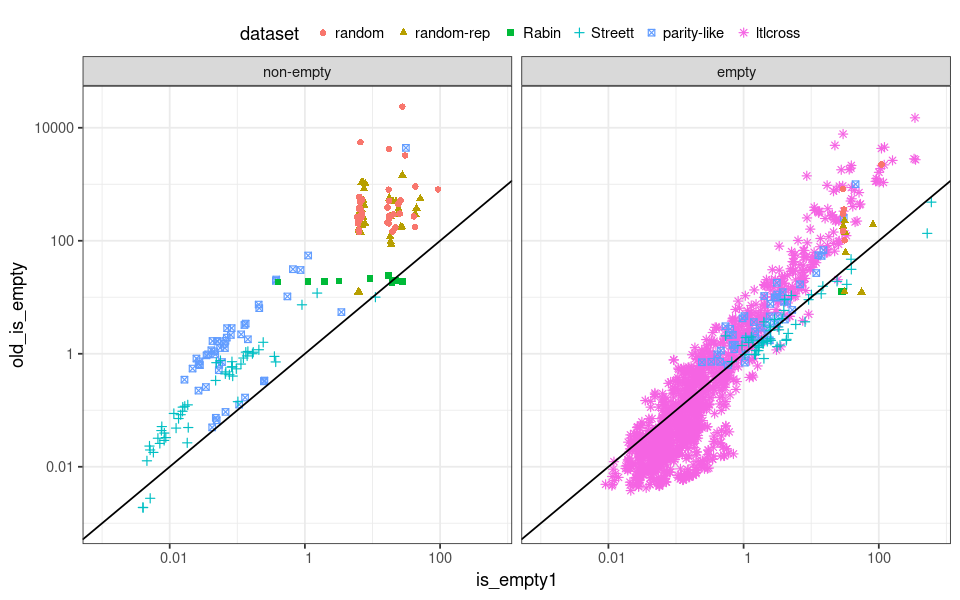

In [15]:
p2 <- ggplot(bench, aes(y=old_is_empty, x=is_empty1, colour=dataset, shape=dataset)) + 
  geom_point() + geom_abline(slope=1, intercept=0) +
  expand_limits(x=0.001, y=0.001) + scale_x_log10(labels=plain) + scale_y_log10(labels=plain) +
  facet_wrap(~ result) + theme_bw() + th + guides(colour = g, shape=g)
p2

# Closer look at the `ltlcross` benchmark

In [16]:
quant.cut <-
function (var, nbclass, include.lowest=TRUE, right=FALSE, dig.lab=5, ...) {
  breaks <- unique(stats::quantile(var,probs=seq(0,1,length=nbclass+1),na.rm=TRUE))
  cut(var,breaks=breaks,dig.lab=dig.lab,right=right, include.lowest=include.lowest, ...)
}

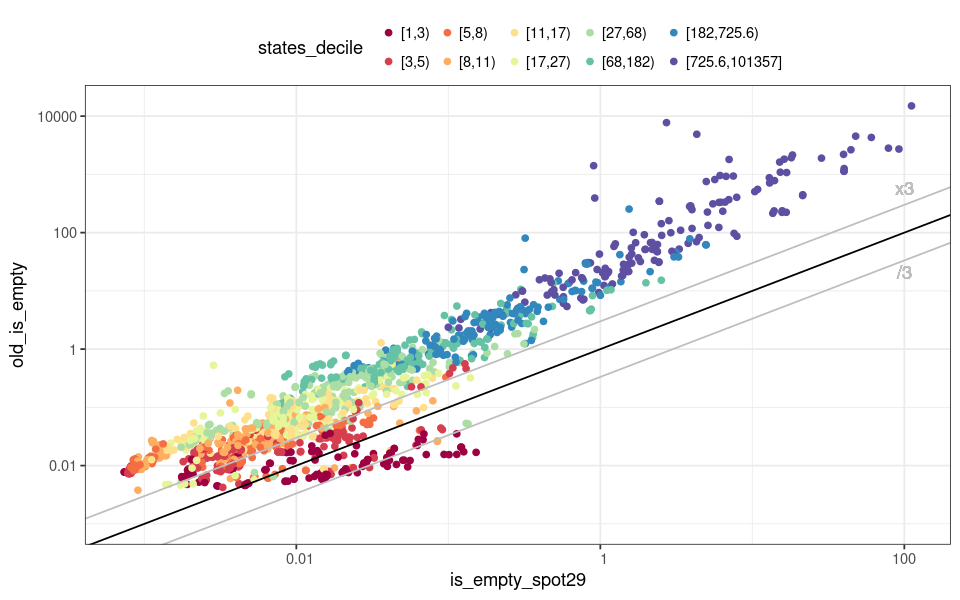

In [17]:
ltlcross <- subset(bench, dataset == "ltlcross")
ltlcross$states_decile <- quant.cut(ltlcross$states, 10, dig.lab=10)
ggplot(ltlcross, aes(x=is_empty_spot29, y=old_is_empty, colour=states_decile)) + 
  geom_point() + geom_abline(slope=1, intercept=0) + 
  geom_abline(slope=1, intercept=log10(3), colour="grey") +
  geom_abline(slope=1, intercept=log10(1/3), colour="grey") +
  geom_text(aes(x=100, y=300), label="x3", vjust=-.7, colour="grey") +
  geom_text(aes(x=100, y=33.3), label="/3", vjust=1.3, colour="grey") +
  expand_limits(x=0.001, y=0.001) + scale_x_log10(labels=plain) + scale_y_log10(labels=plain) +
  theme_bw() + th + scale_colour_brewer(palette = "Spectral")

In [18]:
nrow(ltlcross)

[1] 1507

In [19]:
sum(ltlcross$is_empty_spot29 * 3 < ltlcross$old_is_empty)

[1] 1224

In [20]:
sum(ltlcross$is_empty_spot29 < ltlcross$old_is_empty)

[1] 1409

In [21]:
sum(ltlcross$is_empty_spot29 > ltlcross$old_is_empty)

[1] 98

In [22]:
sum(ltlcross$is_empty_spot29 > ltlcross$old_is_empty*3)

[1] 21

While most of the cases are above largely above the diagonal, some cases more than 4 times slower.  They are all small, each of them have as many SCCs as state, and they seem to come by pair (so maybe there is a feature coming from one of the operand automaton that is causing this).

In [23]:
subset(ltlcross, is_empty_spot29 > old_is_empty * 4)

X1,is_empty1,is_empty2,is_empty_spot29,is_empty_atva19,is_empty_spot28,old_is_empty,result,states,edges,sccs,ntsccs,nrsccs,nrstates,sets,acc,dataset,states_decile
1339,0.24,0.21,0.046,0.045,0.044,0.0105,empty,2,20,2,2,2,2,20,((Fin(0) & (Fin(1)|Fin(2)) & Inf(3) & Fin(4)) | ((Inf(5)&Inf(9)) & (Inf(6) | Fin(7) | Inf(8)))) & ((Fin(10)|Fin(14)) | (Fin(11) & Inf(12) & Fin(13))) & ((Inf(15)&Inf(16)) | Fin(17) | Inf(18) | Inf(19)),ltlcross,"[1,3)"
1246,0.25,0.23,0.051,0.050,0.050,0.0124,empty,2,18,2,2,2,2,20,((Inf(0) & (((Fin(1) | Inf(2)) & Fin(3)) | Fin(4))) | ((Inf(5) | (Fin(6) & Inf(7))) & Fin(8) & Inf(9))) & (((Inf(10) | (Fin(11) & Inf(12))) & Inf(13)) | Fin(14)) & ((Fin(15) & (Fin(16) | Inf(17))) | Inf(18) | Fin(19)),ltlcross,"[1,3)"
1207,0.60,0.53,0.126,0.125,0.125,0.0173,empty,2,52,2,2,2,2,24,(((((Fin(0) | Inf(1)) & Fin(2)) | Fin(3)) & (Fin(4) | Inf(5))) | (((Fin(6) & Inf(7)) | Inf(8)) & (Inf(9)&Inf(11)) & Fin(10))) & ((Fin(12) & (Inf(13) | Fin(14))) | Inf(15) | (Fin(16)|Fin(17))) & ((Inf(18) & Fin(19)) | ((Inf(20) | (Inf(21) & Fin(22))) & Inf(23))),ltlcross,"[1,3)"
1206,0.71,0.62,0.152,0.144,0.144,0.0169,empty,2,52,2,2,2,2,24,(((Inf(0) | (Fin(1) & Inf(2))) & Fin(3) & (Inf(4)&Inf(5))) | ((Fin(6) | Inf(7)) & ((Fin(8) & (Fin(9) | Inf(10))) | Fin(11)))) & ((((Inf(12) & Fin(13)) | Inf(14)) & Inf(15)) | (Inf(16) & Fin(17))) & (((Inf(18) | Fin(19)) & Fin(20)) | (Fin(21)|Fin(23)) | Inf(22)),ltlcross,"[1,3)"
1187,0.36,0.31,0.072,0.071,0.070,0.0155,empty,2,40,2,2,2,2,24,(((Fin(0)|Fin(1)) & ((Fin(2) & Fin(3)) | (Fin(4) & Fin(5)))) | ((Inf(6) | Inf(7)) & (Inf(8)&Inf(11)) & (Inf(9) | Inf(10)))) & (((Inf(12) | Inf(13)) & (Inf(14) | Inf(15))) | (Inf(16)&Inf(17))) & ((Fin(18) & Fin(19)) | (Fin(20) & Fin(21)) | (Fin(22)|Fin(23))),ltlcross,"[1,3)"
1186,0.51,0.44,0.094,0.093,0.093,0.0156,empty,2,40,2,2,2,2,24,((((Fin(0) & Fin(1)) | (Fin(2) & Fin(3))) & (Fin(4)|Fin(5))) | ((Inf(6) | Inf(7)) & (Inf(8) | Inf(9)) & (Inf(10)&Inf(11)))) & ((Inf(12)&Inf(13)) | ((Inf(14) | Inf(15)) & (Inf(16) | Inf(17)))) & ((Fin(18) & Fin(19)) | (Fin(20)|Fin(23)) | (Fin(21) & Fin(22))),ltlcross,"[1,3)"
1171,0.52,0.47,0.114,0.114,0.115,0.0156,empty,2,36,2,2,2,2,24,(((Fin(0) | Inf(1)) & (Inf(2) | (Fin(3) & Inf(4))) & Inf(5)) | (Inf(6) & Fin(7) & ((Fin(8) & (Fin(9) | Inf(10))) | Fin(11)))) & (((Inf(12) | (Inf(13) & Fin(14))) & Inf(15)) | Fin(16) | Inf(17)) & ((Inf(18) & Fin(19)) | (Fin(20) & (Inf(21) | Fin(22))) | Fin(23)),ltlcross,"[1,3)"
1170,0.46,0.41,0.101,0.100,0.100,0.0154,empty,2,36,2,2,2,2,24,((((Fin(0) & (Fin(1) | Inf(2))) | Fin(3)) & Inf(4) & Fin(5)) | ((Fin(6) | Inf(7)) & (Inf(8) | (Fin(9) & Inf(10))) & Inf(11))) & ((Inf(12) & Fin(13)) | (Fin(14) & (Inf(15) | Fin(16))) | Fin(17)) & (Fin(18) | Inf(19) | ((Inf(20) | (Inf(21) & Fin(22))) & Inf(23))),ltlcross,"[1,3)"
1079,0.56,0.50,0.121,0.120,0.120,0.0207,empty,2,72,2,2,2,2,28,(((Inf(0) | (Fin(1)|Fin(2))) & (Inf(3) | (Fin(4) & Inf(5))) & Inf(6)) | ((Inf(7)&Inf(9)) & Fin(8) & ((Fin(10) & (Fin(11) | Inf(12))) | Fin(13)))) & (((Inf(14)&Inf(16)) & Fin(15)) | ((Inf(17) | Fin(18)) & Fin(19)) | Fin(20)) & (Inf(21) | ((Inf(22) | (Inf(23) & Fin(24))) & Inf(25)) | (Fin(26)|Fin(27))),ltlcross,"[1,3)"
1078,0.56,0.50,0.122,0.121,0.120,0.0208,empty,2,72,2,2,2,2,28,((((Fin(0)|Fin(2)) | Inf(1)) & ((Fin(3) & Inf(4)) | Inf(5)) & Inf(6)) | (Fin(7) & ((Fin(8) & (Fin(9) | Inf(10))) | Fin(11)) & (Inf(12)&Inf(13)))) & ((Fin(14) & (Inf(15)&Inf(16))) | (Fin(17) & (Inf(18) | Fin(19))) | Fin(20)) & ((Fin(21)|Fin(23)) | Inf(22) | ((Inf(24) | (Inf(25) & Fin(26))) & Inf(27))),ltlcross,"[1,3)"


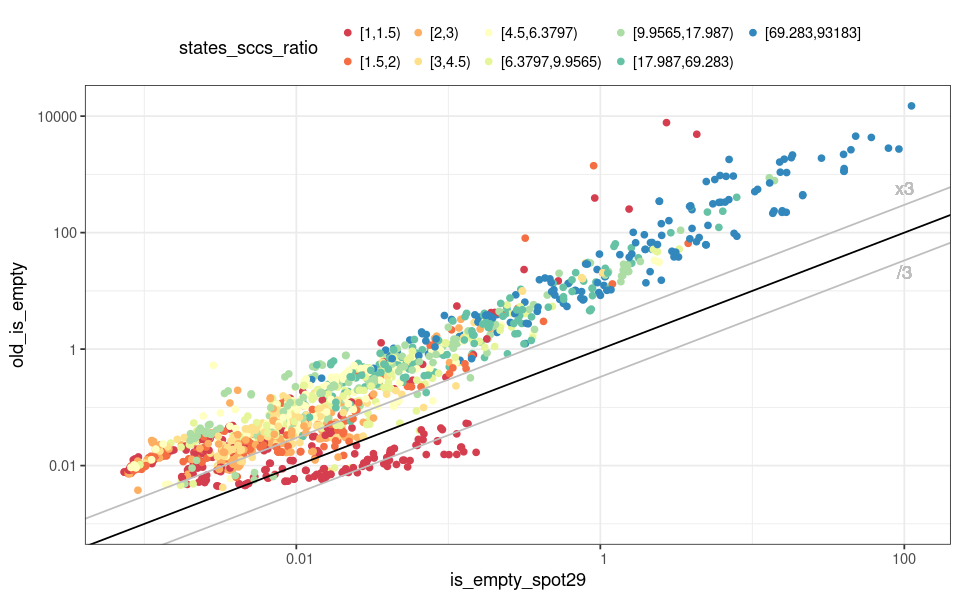

In [24]:
ltlcross$states_sccs_ratio <- quant.cut(ltlcross$states/ltlcross$sccs, 10, dig.lab=5)

ggplot(ltlcross, aes(x=is_empty_spot29, y=old_is_empty, colour=states_sccs_ratio)) + 
  geom_point() + geom_abline(slope=1, intercept=0) + 
  geom_abline(slope=1, intercept=log10(3), colour="grey") +
  geom_abline(slope=1, intercept=log10(1/3), colour="grey") +
  geom_text(aes(x=100, y=300), label="x3", vjust=-.7, colour="grey") +
  geom_text(aes(x=100, y=33.3), label="/3", vjust=1.3, colour="grey") +
  expand_limits(x=0.001, y=0.001) + scale_x_log10(labels=plain) + scale_y_log10(labels=plain) +
  theme_bw() + th + scale_colour_brewer(palette = "Spectral")

So apparently also some of the topmost cases also have small SCCS.

In [25]:
subset(ltlcross, is_empty_spot29 * 1000 < old_is_empty)

X1,is_empty1,is_empty2,is_empty_spot29,is_empty_atva19,is_empty_spot28,old_is_empty,result,states,edges,sccs,ntsccs,nrsccs,nrstates,sets,acc,dataset,states_decile,states_sccs_ratio
1033,22.4,12.0,4.3,4.3,4.3,4885,empty,1512,114448,1154,1153,1153,1511,31,((((Inf(0) & Fin(1)) | (Inf(2) & Fin(3)) | (Inf(4) & Fin(5)) | (Inf(6) & Fin(7)) | (Inf(8) & Fin(9)) | (Inf(10) & Fin(11)) | Inf(12)) & Fin(13)) | ((((Inf(14) | Fin(15)) & (Inf(16) | Fin(17)) & (Inf(18) | Fin(19)) & (Inf(20) | Fin(21)) & (Inf(22) | Fin(23)) & (Inf(24) | Fin(25)) & Fin(26)) | Inf(27)) & Inf(28))) & Fin(29) & Inf(30),ltlcross,"[725.6,101357]","[1,1.5)"
1032,29.6,6.3,2.7,2.7,2.7,7735,empty,2987,204168,2192,2191,1153,1948,31,Fin(0) & Inf(1) & (Inf(2) | ((Inf(3) | Fin(4)) & (Inf(5) | Fin(6)) & (Inf(7) | Fin(8)) & (Inf(9) | Fin(10)) & (Inf(11) | Fin(12)) & (Inf(13) | Fin(14)) & Fin(15))) & ((((Inf(16) & Fin(17)) | (Inf(18) & Fin(19)) | (Inf(20) & Fin(21)) | (Inf(22) & Fin(23)) | (Inf(24) & Fin(25)) | (Inf(26) & Fin(27)) | Inf(28)) & Fin(29)) | Fin(30)),ltlcross,"[725.6,101357]","[1,1.5)"
1029,8.6,2.4,0.9,0.9,0.9,1409,empty,954,44726,629,477,477,802,28,Fin(0) & (Inf(1) | Fin(2)) & (Fin(3) | (((Inf(4) & Fin(5)) | (Inf(6) & Fin(7)) | (Inf(8) & Fin(9)) | (Inf(10) & Fin(11)) | (Inf(12) & Fin(13)) | Inf(14)) & Fin(15))) & (Inf(16) | ((Inf(17) | Fin(18)) & (Inf(19) | Fin(20)) & (Inf(21) | Fin(22)) & (Inf(23) | Fin(24)) & (Inf(25) | Fin(26)) & Fin(27))),ltlcross,"[725.6,101357]","[1.5,2)"


# Tables

In [26]:
# geometric mean
gmean <- function(x) exp(mean(log(x)))
# arithmetic mean
amean <- mean

The following table shows various statistics about the automata from the benchmarks.

In [27]:
bench <- within(bench, { 
    avgdeg <- edges / states
    nrpercent <- 100 * nrstates / states
    })

In [28]:
tabular(Heading() * result * (dataset + (`(all)`=1)) +  Heading("(all)", nearData=FALSE)*1 ~ 
        DropEmpty() * ((`$n$`=1) + (Heading("st.") * states + 
                                    Heading("deg.") * avgdeg +
                                    Heading("SCCs") * sccs + 
                                    Heading("nt.SCCs") * ntsccs + 
                                    Heading("nr.SCCs") * nrsccs +
                                    Heading("nr.st.") * nrstates + 
                                    Heading("(%)") * nrpercent + 
                                    sets) * Heading() * amean), data=bench) 

                                                                                          
           dataset     $n$  st.      deg.   SCCs     nt.SCCs nr.SCCs nr.st.  (%)    sets  
 non-empty random        44 100000.0  1.254    6.227   1.182   1.136 99994.8  99.99 20.000
           random-rep    43 100000.0  1.254    4.791   1.256   1.233 99996.4 100.00 20.000
           Rabin          9  10000.0  1.011   77.000   1.222   1.222  9924.2  99.24 32.000
           Streett       50    992.0  4.000  202.540  57.340  38.260   807.5  78.74 11.000
           parity-like   50   6266.7  7.625 1428.060 322.680 279.480  5085.3  83.09  3.220
           (all)        196  46698.6  3.569  421.954  97.541  81.638 46344.8  90.23 13.974
 empty     random         6 100000.0  1.254    3.667   1.167   1.000 99996.0 100.00 20.000
           random-rep     7 100000.0  1.255    5.286   1.143   1.143 99995.9 100.00 20.000
           Rabin         41  10000.0  1.011  118.317   1.171   1.171  9882.9  98.83 32.000

- $n$ is the number of automata in the data set
- `st.` is the average number of states
- `deg.` is the average degree of these states
- `SCCs` is the average number of SCCs in these automata
- `nt.SCCs` is the average number of SCCs that are not trivial
- `nr.SCCs` is the average number of SCCs that cannot be found rejecting by lines 7--12 on the top-most execution of the algorithm  from the paper
- `nr.st` sum the states in the latter SCCs, and average that over all automata
- `(%)` express `nr.st` as a percentage of `st.`.
- `sets` is the average number of acceptance sets

When the automata are empty, the `nr` metrics help understanding how much of the automaton the algorithm has to recurse into.

This first table shows the improvement between the old and the new C++ emptiness checks.

In [29]:
t1 <- tabular(Heading() * result * (dataset + (`(all)`=1)) + Heading("(all)", nearData=FALSE)*1  
            ~ DropEmpty() * ((`$n$`=1) + 
                             (Heading("\\texttt{old_is_empty}") * old_is_empty * Format(digits=1) + 
                              Heading("\\texttt{is_empty} 2.9") * is_empty_spot29 * Format(digits=1)) * (amean + gmean)), 
             data=bench)
t1

                                                                                       
                            \\texttt{old_is_empty}        \\texttt{is_empty} 2.9       
           dataset     $n$  amean                  gmean  amean                  gmean 
 non-empty random        44 1150.3                  410.4  2.957                  0.284
           random-rep    43  361.7                  242.9  2.788                  0.270
           Rabin          9   19.8                   19.8  1.138                  0.358
           Streett       50    1.0                    0.2  0.002                  0.001
           parity-like   50   92.7                    1.4  0.002                  0.001
           (all)        196  362.4                   10.4  1.329                  0.018
 empty     random         6  662.8                  380.6 21.321                 16.439
           random-rep     7  118.3                   72.5 20.824                 17.795
           Rabin         41   12

The following horizontal layout is a bit harder to read in the notebook, but could save space in the paper.

In [30]:
t1b <- tabular(Heading() * dataset + (`(all)`=1) 
            ~ DropEmpty() * Heading() * result * 
               ((`$n$`=1) + 
                (Heading("\\texttt{old_is_empty}") * old_is_empty * Format(digits=1) + 
                 Heading("\\texttt{is_empty} 2.9") * is_empty_spot29 * Format(digits=1)) * (amean + gmean)), 
             data=bench)
t1b

                                                                                                                                                    
             non-empty                                                             empty                                                            
                       \\texttt{old_is_empty}        \\texttt{is_empty} 2.9              \\texttt{old_is_empty}        \\texttt{is_empty} 2.9       
             $n$       amean                  gmean  amean                  gmean  $n$   amean                  gmean  amean                  gmean 
 random       44       1150.3                  410.4  2.957                  0.284    6   662.8                  380.6 21.321                 16.439
 random-rep   43        361.7                  242.9  2.788                  0.270    7   118.3                   72.5 20.824                 17.795
 Rabin         9         19.8                   19.8  1.138                  0.358   41    12.7           

This second table shows the improvement between the two Python versions.  is_empty1 corresponding to the algorithm as presented in the ATVA'19 paper, and is_empty2 corresponding to the more on-the-fly implementation.

In [31]:
t2 <- tabular(Heading() * result * (dataset + (`(all)`=1)) + Heading("(all)", nearData=FALSE)*1
              ~ DropEmpty() * ((`$n$`=1) + (is_empty1 + is_empty2) * Format(digits=1) * (amean + gmean)), 
              data=bench)
t2

                                                             
                            is_empty1        is_empty2       
           dataset     $n$  amean     gmean  amean     gmean 
 non-empty random        44 16.643    12.427  4.301     0.313
           random-rep    43 13.747    10.690  3.308     0.293
           Rabin          9 11.384     5.583  2.883     0.461
           Streett       50  0.335     0.040  0.004     0.004
           parity-like   50  0.840     0.101  0.005     0.004
           (all)        196  7.575     0.787  1.826     0.034
 empty     random         6 43.323    37.327 37.264    29.902
           random-rep     7 41.904    38.851 36.603    31.850
           Rabin         41 29.038    29.034 28.836    28.834
           Streett       50 28.113     3.870 24.696     2.541
           parity-like   50  4.337     1.998  1.797     0.686
           ltlcross    1507  3.065     0.213  1.267     0.097
           (all)       1661  4.808     0.292  2.948     0.136
 (all)  

# Export to LaTeX

In [32]:
tmp <- booktabs()
table_options(titlerule = '\\cmidrule(l)')
tmp <- latex(file="table1.tex", t1)
tmp <- latex(file="table1b.tex", t1b)
tmp <- latex(file="table2.tex", t2)
tikz("plot1.tex", sanitize=TRUE, standAlone=TRUE, width=4.8, height=3)
p1 + labs(x="\\tt is_empty", y="\\tt old_is_empty")
dev.off()

png 
  2